# Estudio de un dataset e implementación de un modelo de regressión lineal sobre el mismo
#### Juan Carlos Soriano (1493037) y Jorge Giménez (1493035)

## Estudio del dataset

### 1. Primeramente realizamos los imports necesarios y ajustamos algunas opciones de visualización

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 15) 

### 2. Cargamos el dataset usando pandas y revisamos algunos datos de referéncia:

In [15]:
dataFrame = pd.read_csv('C:\\Users\\JGimenez\\Desktop\\APC_Concrete_MPa\\Database\\Concrete_Data_Yeh.csv', header=0, delimiter=',')

- Dimensiones del dataframe:

In [16]:
dataFrame.shape

(1030, 9)

Tenemos 1030 registros y 9 variables, una de las cuales es el output que quisiéramos predecir.

- Valores nulos por cada atributo:

In [17]:
dataFrame.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

No tenemos valores nulos, lo cuál es bueno.

- Descripción rápida del dataset:

In [18]:
dataFrame.describe()

cement     slag   flyash    water  superplasticizer  coarseaggregate  \
count 1030.000 1030.000 1030.000 1030.000          1030.000         1030.000   
mean   281.168   73.896   54.188  181.567             6.205          972.919   
std    104.506   86.279   63.997   21.354             5.974           77.754   
min    102.000    0.000    0.000  121.800             0.000          801.000   
25%    192.375    0.000    0.000  164.900             0.000          932.000   
50%    272.900   22.000    0.000  185.000             6.400          968.000   
75%    350.000  142.950  118.300  192.000            10.200         1029.400   
max    540.000  359.400  200.100  247.000            32.200         1145.000   

       fineaggregate      age    csMPa  
count       1030.000 1030.000 1030.000  
mean         773.580   45.662   35.818  
std           80.176   63.170   16.706  
min          594.000    1.000    2.330  
25%          730.950    7.000   23.710  
50%          779.500   28.000   34.445  
75%          824.000   56.000   46.135  
max          992.600  365.000   82.600

- Primeras 10 filas:

In [19]:
dataFrame.head(10)

cement    slag  flyash   water  superplasticizer  coarseaggregate  \
0 540.000   0.000   0.000 162.000             2.500         1040.000   
1 540.000   0.000   0.000 162.000             2.500         1055.000   
2 332.500 142.500   0.000 228.000             0.000          932.000   
3 332.500 142.500   0.000 228.000             0.000          932.000   
4 198.600 132.400   0.000 192.000             0.000          978.400   
5 266.000 114.000   0.000 228.000             0.000          932.000   
6 380.000  95.000   0.000 228.000             0.000          932.000   
7 380.000  95.000   0.000 228.000             0.000          932.000   
8 266.000 114.000   0.000 228.000             0.000          932.000   
9 475.000   0.000   0.000 228.000             0.000          932.000   

   fineaggregate  age  csMPa  
0        676.000   28 79.990  
1        676.000   28 61.890  
2        594.000  270 40.270  
3        594.000  365 41.050  
4        825.500  360 44.300  
5        670.000   90 47.030  
6        594.000  365 43.700  
7        594.000   28 36.450  
8        670.000   28 45.850  
9        594.000   28 39.290

### 3. Hacemos unos cuántos plots que nos ayudarán a entender mejor los datos:

- Plot de un histograma por cada variable del dataset:

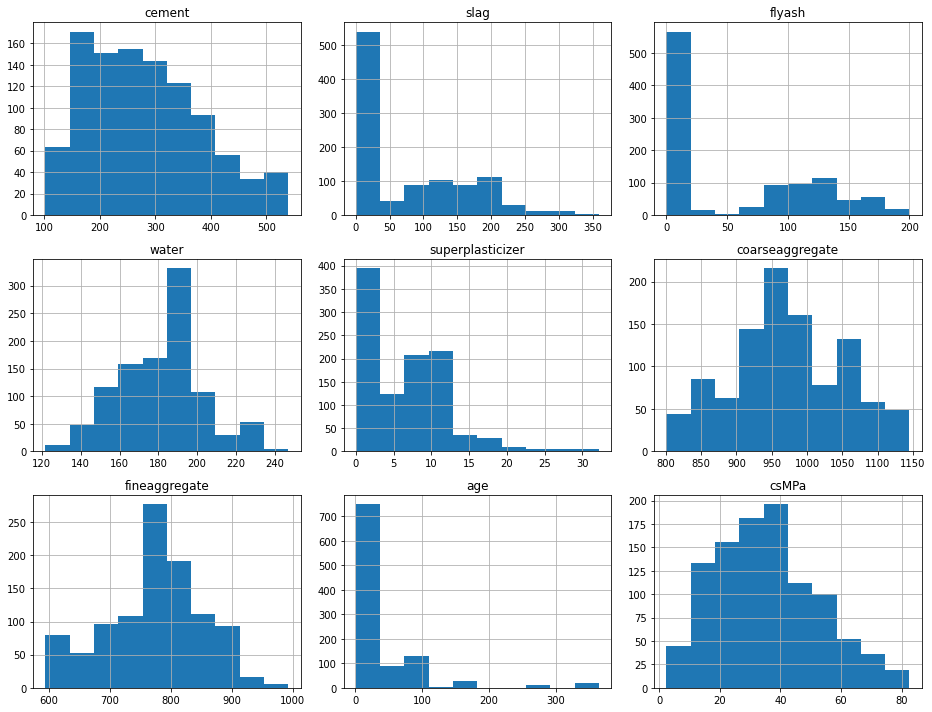

In [20]:
fig, axs = plt.subplots(3, 3)

varIdx = 0
for x in range(3):
    for y in range(3):
        plt.sca(axs[x,y])
        axs[x,y].set_title(dataFrame.columns[varIdx])
        dataFrame[dataFrame.columns[varIdx]].hist(figsize=(13,10))
        varIdx+=1

fig.tight_layout()
plt.show()

Vemos que algunas variables siguen una distribución considerablemente cercana a la gaussiana ('cement', 'water', 'fineaggregate', 'coarseaggregate' y el output 'csMPa'), sin embargo el resto de variables quedan mermadas por tener tantos registros en el valor 0, quizás sería interesante tratar esto.

- Plot de un scatterplot por variable  de entrada (cement, slag, flyash...) contra la variable output (csMPa) 

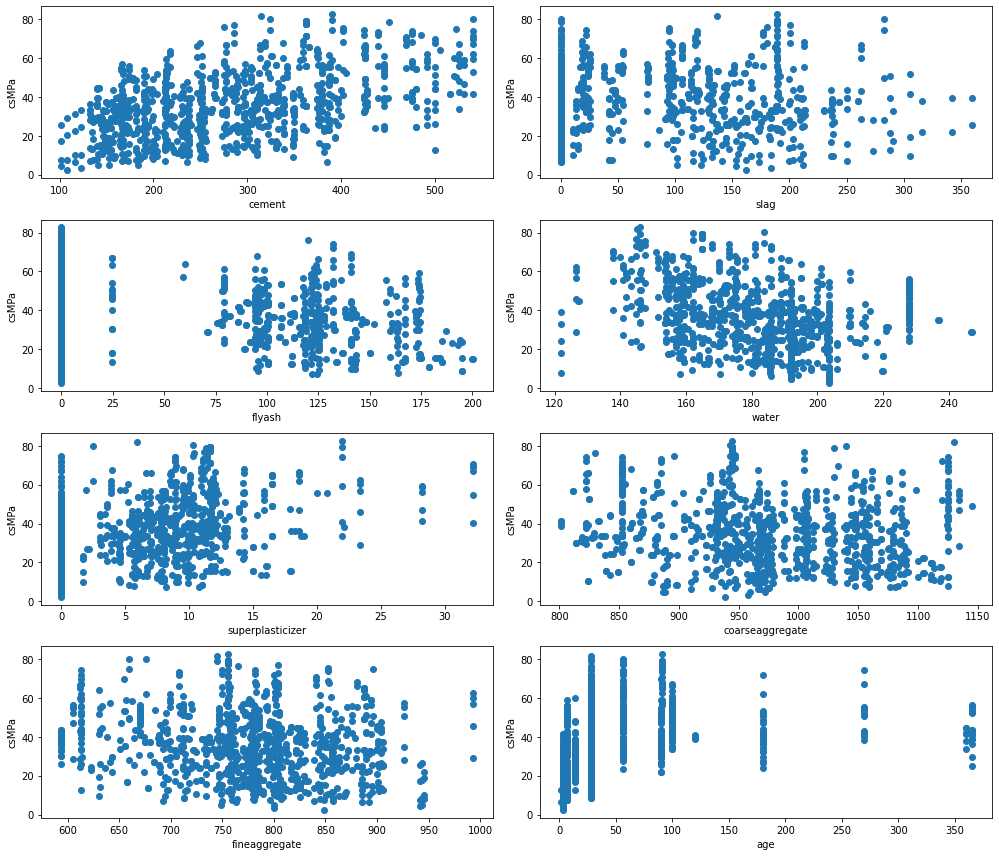

In [42]:
fig, axs = plt.subplots(4, 2, figsize=(14,12))

varIdx = 0
for x in range(4):
    for y in range(2):
        axs[x,y].set(xlabel=dataFrame.columns[varIdx], ylabel='csMPa')
        axs[x,y].plot(dataFrame[dataFrame.columns[varIdx]], dataFrame['csMPa'], 'o')
        varIdx+=1

fig.tight_layout()
plt.show()

Tras visualizar todas las variables respecto al output deseado, vemos que hay muchas medidas acumuladas en el 0 para algunas variables.
De todas formas, podemos ser bastante optimistas!

- Plot de las correlaciones entre variables:

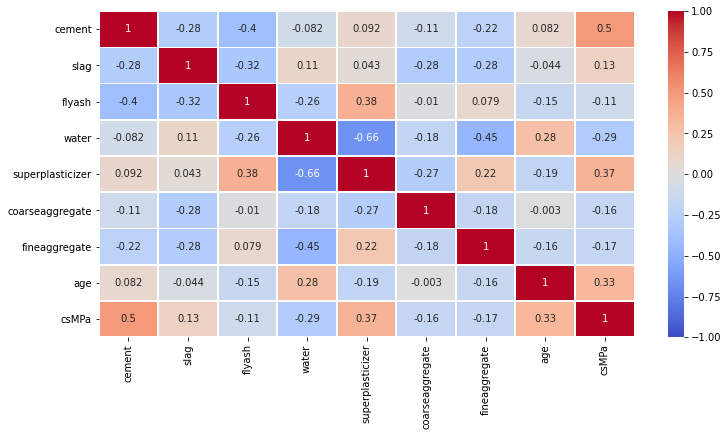

In [43]:
plt.figure(figsize = (12,6))
sns.heatmap(dataFrame.corr(), annot=True, linewidths= .75, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

Determinamos que en principio las variables que deberíamos usar para hacer la regressión son: 'age', 'superplasticizer', 'water' y 'cement'.
De todas maneras, será interesante probar con la penalización LASSO para ver si realmente acaba descartando estas variables / asignandoles un valor muy bajo o si por lo contrario no estábamos en lo cierto y los resultados obtenidos con LASSO van en contra de lo que exponíamos justo ahora.

### 4.Será interesante limpiar y estandarizar los datos y volver a ver los gráficos anteriores.

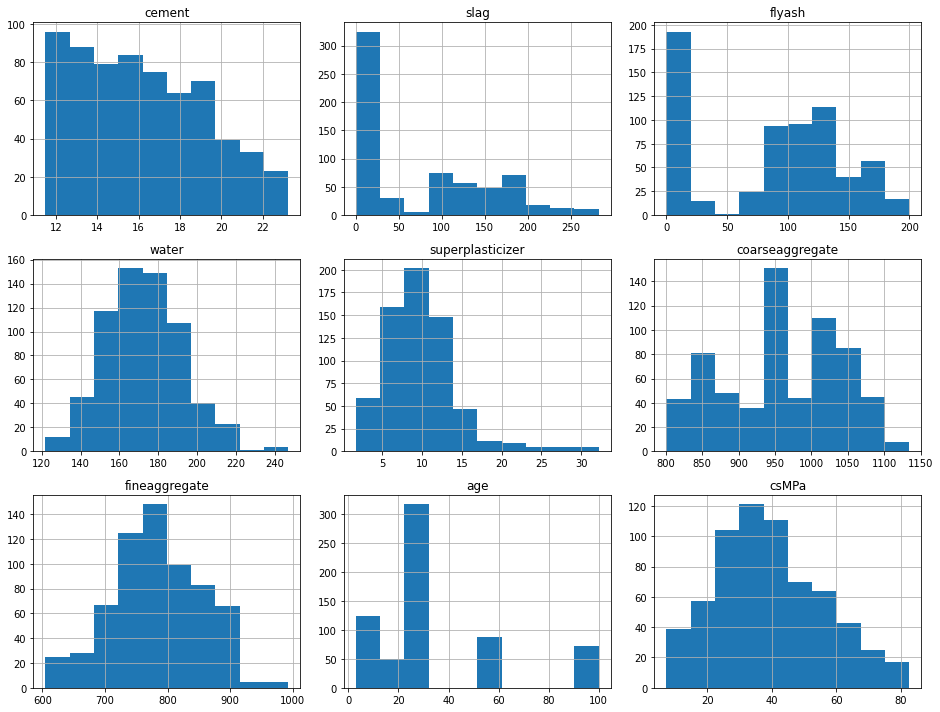

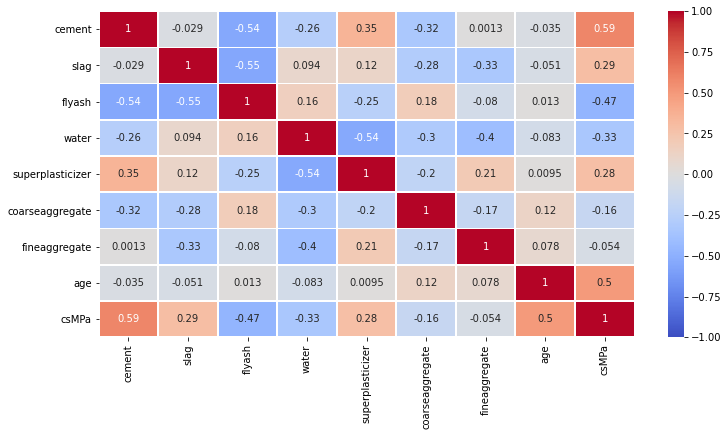

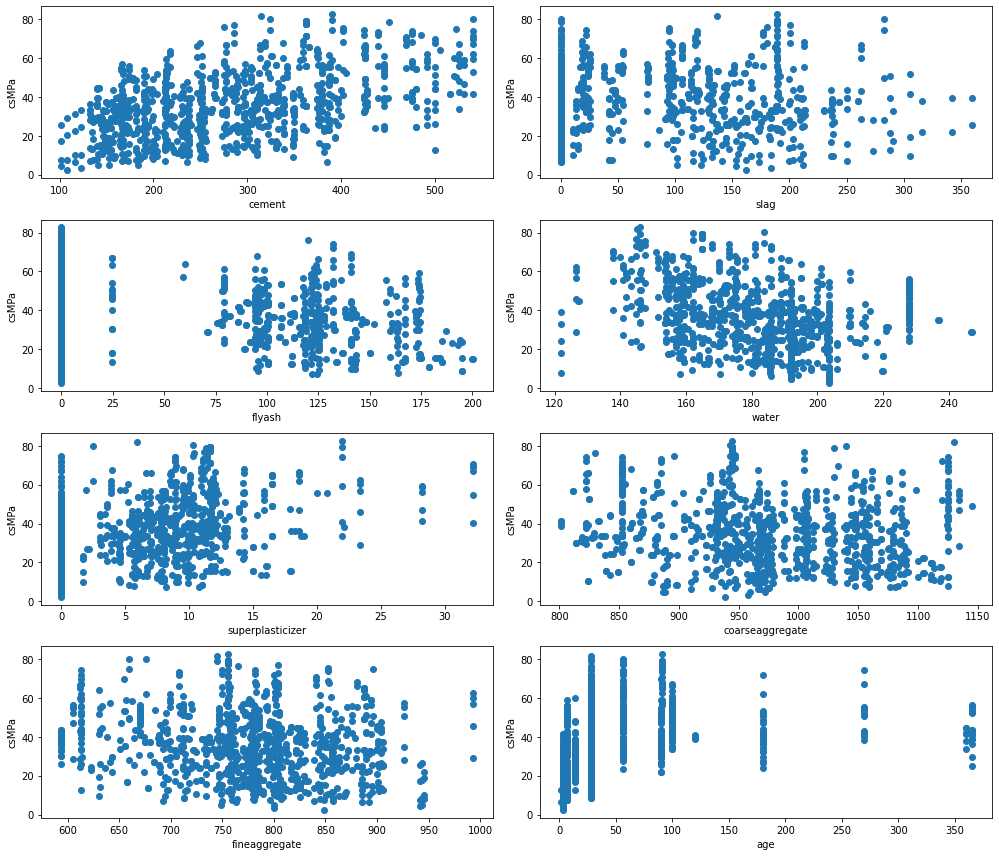

In [108]:
cleanDataFrame = dataFrame.query('superplasticizer != 0 and age != 0')
cleanDataFrame['cement'] = np.sqrt(cleanDataFrame['cement'])

fig, axs = plt.subplots(3, 3)

varIdx = 0
for x in range(3):
    for y in range(3):
        plt.sca(axs[x,y])
        axs[x,y].set_title(cleanDataFrame.columns[varIdx])
        cleanDataFrame[cleanDataFrame.columns[varIdx]].hist(figsize=(13,10))
        varIdx+=1

fig.tight_layout()
plt.show()

plt.figure(figsize = (12,6))
sns.heatmap(cleanDataFrame.corr(), annot=True, linewidths= .75, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

fig, axs = plt.subplots(4, 2, figsize=(14,12))

varIdx = 0
for x in range(4):
    for y in range(2):
        axs[x,y].set(xlabel=dataFrame.columns[varIdx], ylabel='csMPa')
        axs[x,y].plot(dataFrame[dataFrame.columns[varIdx]], dataFrame['csMPa'], 'o')
        varIdx+=1

fig.tight_layout()
plt.show()

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
stdDataFrame = pd.DataFrame(scaler.fit_transform(cleanDataFrame))
stdDataFrameAllData = pd.DataFrame(scaler.fit_transform(dataFrame))
stdDataFrame.columns = cleanDataFrame.columns.to_list()
stdDataFrame.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   2.302 -0.926  -1.370 -0.561            -1.599            0.985   
1   2.302 -0.926  -1.370 -0.561            -1.599            1.171   
2   1.018  1.466  -1.370 -0.147             0.062           -0.428   
3   0.479  2.389  -1.370  0.129            -0.266            1.071   
4   1.439  0.418  -1.370 -0.996             1.460           -1.347   

   fineaggregate    age  csMPa  
0         -1.511 -0.216  2.426  
1         -1.511 -0.216  1.342  
2         -0.380 -1.143 -0.305  
3         -2.411 -1.143 -0.640  
4          1.447 -1.143 -0.365

Para ello, importamos sklearn y damos uso de sus clases para estandarizar los datos.

In [111]:
stdDataFrame.describe()

cement    slag  flyash   water  superplasticizer  coarseaggregate  \
count 651.000 651.000 651.000 651.000           651.000          651.000   
mean    0.000   0.000  -0.000  -0.000            -0.000            0.000   
std     1.001   1.001   1.001   1.001             1.001            1.001   
min    -1.565  -0.926  -1.370  -2.617            -1.773           -1.981   
25%    -0.910  -0.926  -1.370  -0.714            -0.626           -0.896   
50%    -0.128  -0.394   0.251  -0.075            -0.091            0.005   
75%     0.859   0.807   0.659   0.695             0.390            0.773   
max     2.302   2.650   1.873   3.786             4.891            2.156   

       fineaggregate     age   csMPa  
count        651.000 651.000 651.000  
mean          -0.000   0.000   0.000  
std            1.001   1.001   1.001  
min           -2.506  -1.143  -1.927  
25%           -0.486  -0.735  -0.753  
50%           -0.045  -0.216  -0.094  
75%            0.636  -0.216   0.693  
max            2.925   2.452   2.582

Comprobamos que ahora, efectivamente, los datos estan estandarizados, volvamos a plotear las variables:

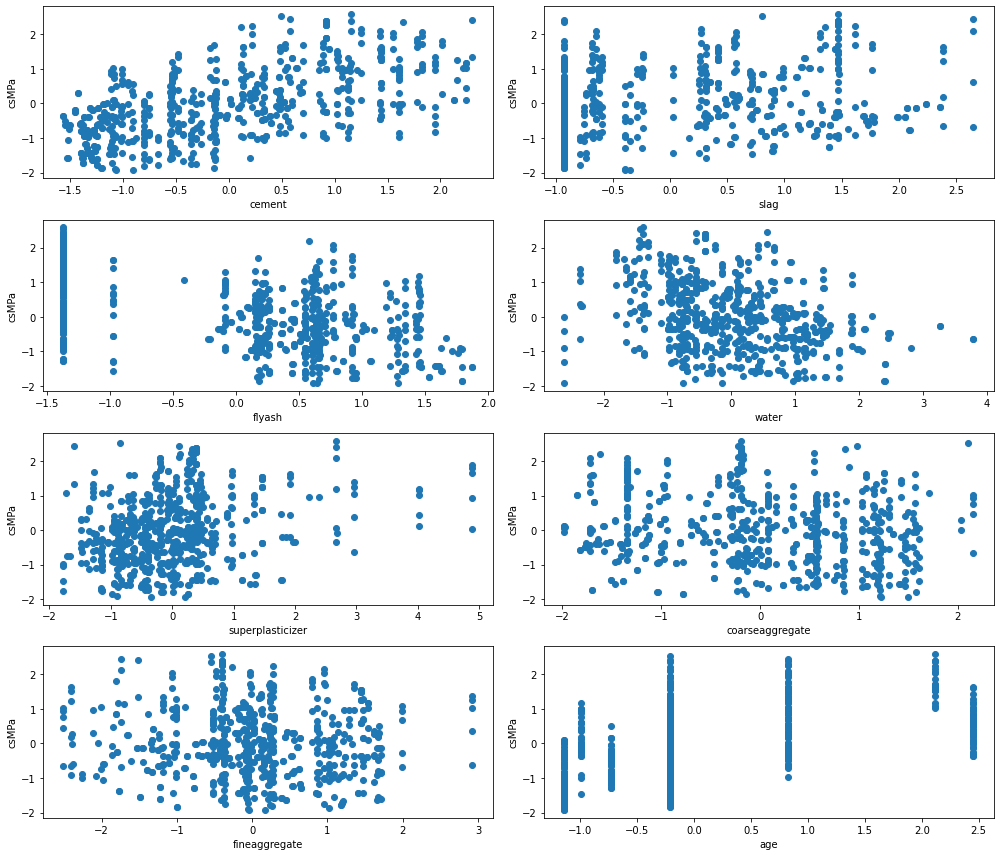

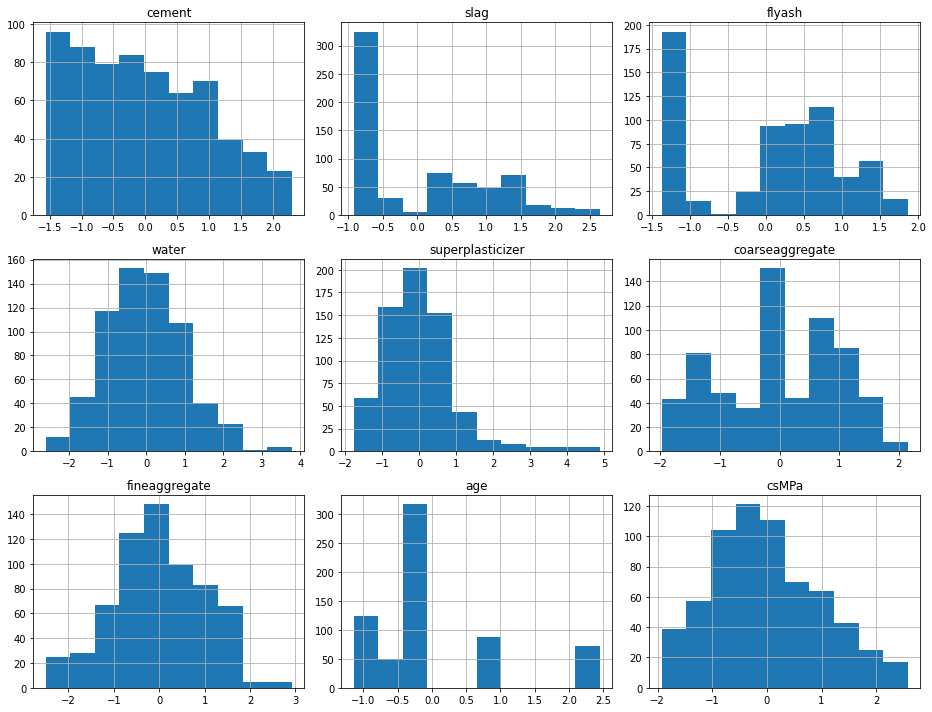

In [112]:
fig, axs = plt.subplots(4, 2, figsize=(14,12))

varIdx = 0
for x in range(4):
    for y in range(2):
        axs[x,y].set(xlabel=stdDataFrame.columns[varIdx], ylabel='csMPa')
        axs[x,y].plot(stdDataFrame[stdDataFrame.columns[varIdx]], stdDataFrame['csMPa'], 'o')
        varIdx+=1

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(3, 3)

varIdx = 0
for x in range(3):
    for y in range(3):
        plt.sca(axs[x,y])
        axs[x,y].set_title(stdDataFrame.columns[varIdx])
        stdDataFrame[stdDataFrame.columns[varIdx]].hist(figsize=(13,10))
        varIdx+=1

fig.tight_layout()
plt.show()

Como es de esperar, los datos se matienen con la misma distribución pero ahora todas las variables se mueven en el mismo rango

## Primer intento de regressión

Vamos a intentar hacer una regressión sin hacer nada con los datos más allá de normalizarlos, nos parece positivo tener algún resultado contra el que poder comparar posteriormente cuando vayamos aplicando mejoras.

In [132]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model

Importamos 'preprocessing' para que nos brinde un normalizador para los datos.  
Importamos 'train_test_split' para separar los datos en train y test fácil y rápidamente.  
Importamos 'linear_model' para tener disponible el modelo de regressión lineal que vamos a entrenar y testear.

In [133]:
'''
nonNormalizedValues = dataFrame.values
minMaxScaler = preprocessing.MinMaxScaler()
normalizedValues = minMaxScaler.fit_transform(nonNormalizedValues)
normalizedDataFrame = pd.DataFrame(normalizedValues)
normalizedDataFrame = dataFrame
normalizedDataFrame.head()
'''

'\nnonNormalizedValues = dataFrame.values\nminMaxScaler = preprocessing.MinMaxScaler()\nnormalizedValues = minMaxScaler.fit_transform(nonNormalizedValues)\nnormalizedDataFrame = pd.DataFrame(normalizedValues)\nnormalizedDataFrame = dataFrame\nnormalizedDataFrame.head()\n'

Ahora que ya tenemos los datos normalizados podemos empezar a separar los datos y entrenar nuestro primer modelo.  
Para hacer el paso inverso a la normalización de los datos, podemos usar 'preprocessing.inverse_transform(values)'.

In [178]:
#xTrain, xTest, yTrain, yTest = train_test_split(normalizedDataFrame.iloc[:, :8], normalizedDataFrame.iloc[:, 8:9], test_size=0.2)
xTrain, xTest, yTrain, yTest = train_test_split(stdDataFrame.iloc[:, :8], stdDataFrame.iloc[:, 8:9], test_size=0.1)
print(f'Registros de train: {len(xTrain)}')
print(f'Registros de test: {len(xTest)}')

Registros de train: 585
Registros de test: 66


Al elegir un tamaño de test del 20% del dataset completo, obtenemos 824 registros para entrenar el modelo y 206 registros sobre los que lo testearemos.

     cement   slag  flyash  water  superplasticizer  coarseaggregate  \
51    1.439  0.418  -1.370 -1.103             1.919           -0.306   
589  -1.527 -0.926   1.315  0.370             0.040            0.005   
16    0.575  2.650  -1.370  0.554             0.106           -0.222   
91    1.152  1.464  -1.370 -1.384             2.662           -0.198   
355  -0.956  0.715   0.552  0.355            -1.358            0.579   
..      ...    ...     ...    ...               ...              ...   
409   1.128 -0.673   0.153 -0.817             0.390           -0.281   
332  -1.088  0.716   0.714  0.129            -0.441            0.567   
234   0.262 -0.926   0.189 -0.249            -0.091            0.007   
393   1.604 -0.623  -0.090 -0.561             0.106            0.079   
12    1.439  0.418  -1.370 -0.996             1.460           -1.347   

     fineaggregate    age  
51           0.278 -0.216  
589          0.295 -0.216  
16          -1.737 -1.143  
91          -0.393  0.8

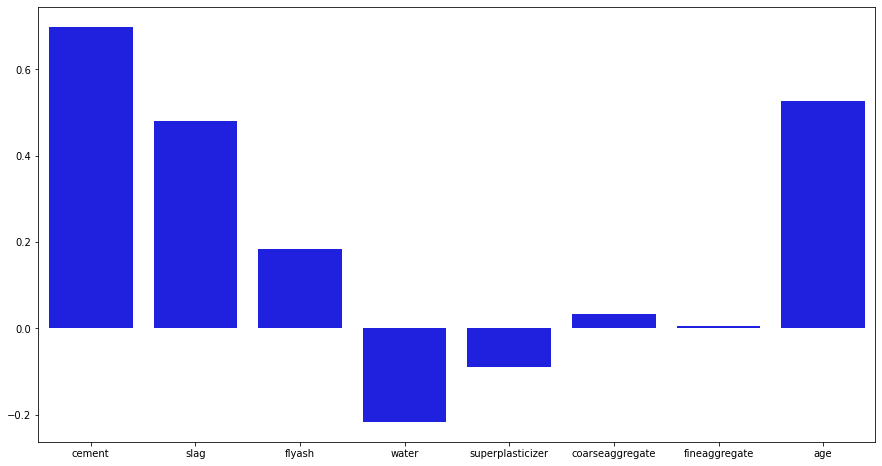

In [148]:
firstLinearModel = linear_model.LinearRegression()
print(xTrain)
print("-----")
print(yTrain)
firstLinearModel.fit(xTrain, yTrain)
plt.figure(figsize = (15,8))
sns.barplot(dataFrame.columns[:-1], firstLinearModel.coef_[0], color='blue')
plt.show()

Ya tenemos el primer modelo entrenado y hemos visualizado los pesos que ha otorgado a cada variable.  
Visualizems el modelo y luego veamos que scores y errores obtiene.

In [179]:
print(f'Training score: {firstLinearModel.score(xTrain, yTrain)}')
print(f'Training MSE: {np.mean((firstLinearModel.predict(xTrain) - yTrain)**2)}')
print(f'Test score: {firstLinearModel.score(xTest, yTest)}')
print(f'Test MSE: {np.mean((firstLinearModel.predict(xTest) - yTest)**2)}')

Training score: 0.7690163608384519
Training MSE: csMPa   0.234
dtype: float64
Test score: 0.7310994068160446
Test MSE: csMPa   0.234
dtype: float64


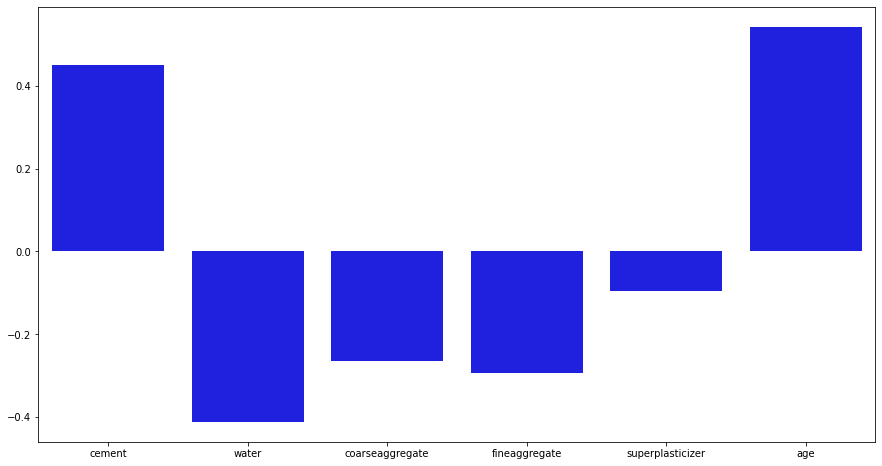

In [184]:
secondLinearModel = linear_model.LinearRegression()
xTrain = xTrain[['cement', 'water', 'coarseaggregate', 'fineaggregate', 'superplasticizer', 'age']]
xTest = xTest[['cement', 'water', 'coarseaggregate', 'fineaggregate', 'superplasticizer', 'age']]
secondLinearModel.fit(xTrain, yTrain)
plt.figure(figsize = (15,8))
sns.barplot(xTrain.columns, secondLinearModel.coef_[0], color='blue')
plt.show()

In [191]:
print(f'Training score: {secondLinearModel.score(stdDataFrameAllData.iloc[:,:8], stdDataFrameAllData.iloc[:,8:9])}')
print(f'Training MSE: {np.mean((secondLinearModel.predict(stdDataFrameAllData.iloc[:,:8]) - stdDataFrameAllData.iloc[:,8:9])**2)}')
print(f'Test score: {secondLinearModel.score(stdDataFrameAllData.iloc[:,:8], stdDataFrameAllData.iloc[:,8:9])}')
print(f'Test MSE: {np.mean((secondLinearModel.predict(stdDataFrameAllData.iloc[:,:8]) - stdDataFrameAllData.iloc[:,8:9])**2)}')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 8)